# Multiple Linear Regression
developer: Mohammad mehdi Sahraei
***

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the data with pandas

- taking a look at the dataset and analyzing data

In [2]:
df = pd.read_csv("Salary_dataset.csv")

df.head() #View the beginning of the data
#tail is used for Viewing the end of the data

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df.dtypes

Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object

### Data Exploration

In [4]:
#data summary 
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [5]:
df['YearsExperience'].value_counts()

3.3     2
4.1     2
1.2     1
5.4     1
10.4    1
9.7     1
9.6     1
9.1     1
8.8     1
8.3     1
8.0     1
7.2     1
6.9     1
6.1     1
6.0     1
5.2     1
1.4     1
5.0     1
4.6     1
4.2     1
4.0     1
3.8     1
3.1     1
3.0     1
2.3     1
2.1     1
1.6     1
10.6    1
Name: YearsExperience, dtype: int64

### Data Cleaning
- dropping

In [6]:
df = df.drop('Unnamed: 0', axis='columns')
print ("Shape of dataset before cleaning: ", df.shape)
# df.head(10)

Shape of dataset before cleaning:  (30, 2)


In [7]:
df.head(10)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


### data histogram

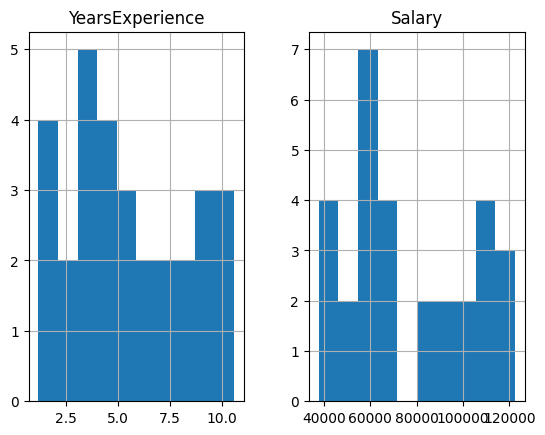

In [8]:
df.hist()
plt.show()

### drawing plot and scatter

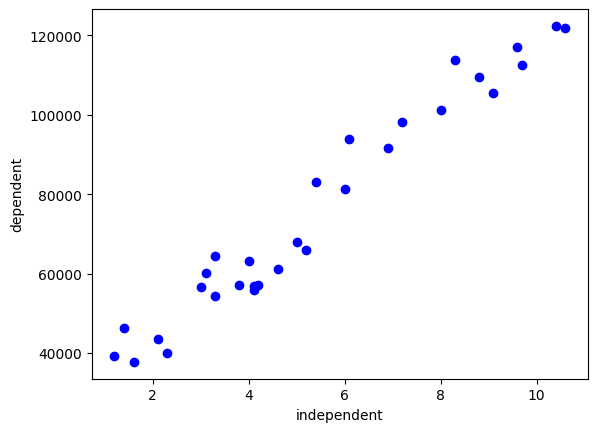

In [16]:
plt.scatter(df.YearsExperience, df.Salary,  color='blue')
plt.xlabel("independent")
plt.ylabel("dependent")
plt.show()

### Creating train and test dataset
#### 20 % for test and 80 for train

In [12]:
msk = np.random.rand(len(df)) < 0.80

train = df[msk]
test = df[~msk]

In [15]:
xx , yy = train.shape,test.shape
print(f'{xx} \n')
print(f'{yy} \n')

(25, 2) 

(5, 2) 



### training  model

- Converting the data into a normal array So that it is suitable for the model format

- [link regr](https://scikit-learn.org/stable/supervised_learning.html)

In [18]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

#asanyarray: converting to normal array 
train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[['Salary']])

#train_x , train_y data are fitted with together and the best line is obtained and it will be final model
regr.fit (train_x, train_y)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9618.3722256]]
Intercept:  [23883.55462604]


### final Plot and scatter 
- fitting line
- regr.coef_: θ1 | regr.intercept_: θ0 | train_x: x
- formula: y = θ0+ θ1*x

Text(0, 0.5, 'Price')

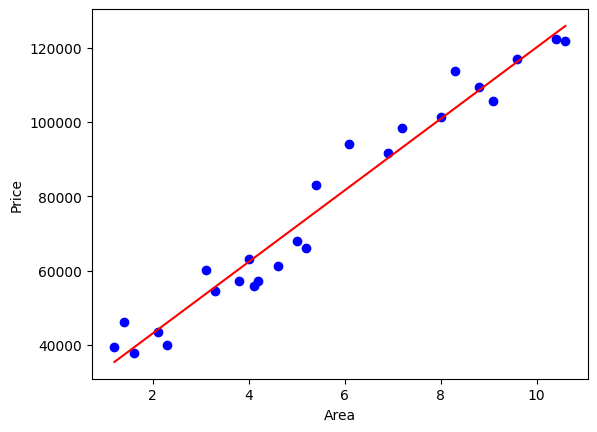

In [20]:
plt.scatter(train.YearsExperience, train.Salary,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Area")
plt.ylabel("Price")

### model Evaluation
-  absolute: ghadre motlagh

In [23]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])
predict = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predict) )

Mean absolute error: 4772.52
Residual sum of squares (MSE): 30849165.22
R2-score: 0.93


In [24]:
print(predict[:5],'\n')
print(test_y[:5])

[[ 52738.67130283]
 [ 55624.18297051]
 [ 63318.88075099]
 [ 81593.78797963]
 [117181.76521434]] 

[[ 56643.]
 [ 64446.]
 [ 56958.]
 [ 81364.]
 [112636.]]
